# Interactias Geo Selected Network

One way of examining the impact of invasive species is to look at all their interactions and the interations those organisms have with each other. This full interaction network gives you a good idea whether a species might be a "keystone" species 

The networks create from all interacting species globally can be misleading, because not all members of the network live in one place. The next step is to filter the species in the network geographically, just to find the interactions that might occur in an area.

I will harvest species interactions data from GLOBI (https://www.globalbioticinteractions.org/) to discover the species that interact with an invasive species.
I will then harvest all the interactions for those species to create two tiers of interactions.
I will then count all the occurences of these in species in GBIF for an area.
I will then create a network diagram to visualize this.

This notebook takes considerable insperation and code from Yikang Li's project on GLoBI (https://curiositydata.org/part1_globi_access/).

In [160]:
import sys
print(sys.version)

#Python 3.7.4 (default, Aug 9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
#pygbif 0.3.0

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [72]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from pygbif import species
from pygbif import occurrences as occ

### Setting up some parameters

In [583]:
# There is no point accepting all the species that have more than one record.
# There are too many casual records of plants and biirds
thresholdForOccNum = 20

## Load the GLoBI data

The current snapshot of GLoBI was taken on 2019-11-05 from https://depot.globalbioticinteractions.org/snapshot/target/data/tsv/interactions.tsv.gz


In [73]:
# This takes a few minutes to load in.
# the low_memory=False property will get rid of a warning, but will not help if there is really no memory left
data = pd.read_csv('C://Users//quentin//Documents//interactias//interactias//data//interactions.tsv', delimiter='\t', encoding='utf-8', low_memory=False)
len(data)

3878740

In [74]:
# Take a little look at the data to make sure it makes sense
data.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,...,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
0,EOL:12001247,EOL:12001247 | OTT:133330 | IRMNG:11733708 | N...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
1,EOL:12001247,EOL:12001247 | OTT:133330 | IRMNG:11733708 | N...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
2,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
3,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
4,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z


## Drop duplicates

This line gets rid of duplicate interations. I currently can't see a reason to keep them, but this perhaps should be checked. 
Some more common interactions might have more support in the literature and therefore more records. Deduplicating them tends to equal out rare interactions with common ones.

In [75]:
data.drop_duplicates(['sourceTaxonName', 'interactionTypeName', 'targetTaxonName'], inplace = True)

In [76]:
## Check how many rows are left
len(data)

1103723

## Remove ranks that are not species
Many entries in GLoBI are non-specific interations at a high taxonomic level. For example, roses are visited by bees.
I have chossen to remove these interactions from the study, at least preliminarly

In [77]:
data.drop(data[data['sourceTaxonRank'] != 'species'].index, inplace = True)
data.drop(data[data['targetTaxonRank'] != 'species'].index, inplace = True)

In [78]:
## Check how many rows are left
len(data)

536018

## Remove "interactsWith"
There are many vague interactions with the term interactsWith. These aren't really that useful, because it could be any kind of interaction, positive or negative, direct or indirect.

In [79]:
data = data[data.interactionTypeName != 'interactsWith']

len(data)

394573

## Define the key taxon for the notebook for which to find all interactions


In [481]:
#taxon = "Oxalis corniculata"
#taxon = "Oxalis pes-caprae"
#taxon = "Lantanophaga pusillidactyla"
#taxon = "Lantana camara"
#taxon = "Cirsium vulgare"
taxon = "Procyon lotor" # raccoon
#taxon = "not exist"
#taxon = "Sciurus carolinensis" # Eastern grey squirrel

In [482]:
## Define the country of interest

In [483]:
country  = 'BE' #Belgium

## Check to see if the taxon exits in GBIF

In [484]:
try:
    key = species.name_suggest(q=taxon, limit = 1)
    #print(key)
    
    if len(key) == 0:
        raise ValueError("Taxon not found on GBIF")
except ValueError as ve:
    print(ve)
    exit(1)




In [485]:
print('The taxon to be studied is ' + key[0]['scientificName'])

The taxon to be studied is Procyon lotor (Linnaeus, 1758)


In [486]:
# What are all the types of interactions involving taxon as source taxon?
data[data['sourceTaxonName'] == taxon]['interactionTypeName'].unique()

array(['eats', 'preysOn'], dtype=object)

In [487]:
# What are all the types of interactions involving taxon as target taxon?
data[data['targetTaxonName'] == taxon]['interactionTypeName'].unique()

array(['eats', 'parasiteOf', 'pathogenOf', 'ectoParasiteOf', 'hasHost',
       'endoparasiteOf', 'preysOn'], dtype=object)

How many taxon sources do I have?

In [488]:
len(data[data['sourceTaxonName'] == taxon])

88

How many taxon targets do I have?

In [489]:
len(data[data['targetTaxonName'] == taxon])

245

Gather together all the data where the target is the taxon in question.

In [490]:
# What are the columns of this dataset?
data.columns

Index(['sourceTaxonId', 'sourceTaxonIds', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonPathNames', 'sourceTaxonPathIds',
       'sourceTaxonPathRankNames', 'sourceTaxonSpeciesName',
       'sourceTaxonSpeciesId', 'sourceTaxonGenusName', 'sourceTaxonGenusId',
       'sourceTaxonFamilyName', 'sourceTaxonFamilyId', 'sourceTaxonOrderName',
       'sourceTaxonOrderId', 'sourceTaxonClassName', 'sourceTaxonClassId',
       'sourceTaxonPhylumName', 'sourceTaxonPhylumId',
       'sourceTaxonKingdomName', 'sourceTaxonKingdomId', 'sourceId',
       'sourceOccurrenceId', 'sourceCatalogNumber', 'sourceBasisOfRecordId',
       'sourceBasisOfRecordName', 'sourceLifeStageId', 'sourceLifeStageName',
       'sourceBodyPartId', 'sourceBodyPartName', 'sourcePhysiologicalStateId',
       'sourcePhysiologicalStateName', 'interactionTypeName',
       'interactionTypeId', 'targetTaxonId', 'targetTaxonIds',
       'targetTaxonName', 'targetTaxonRank', 'targetTaxonPathNames',
       'targetTaxonPath

## Simplify the table to make it readable

## Get the primary interation data for the species in question

In [525]:
    interactDataTaxon = data[data['targetTaxonName'] == taxon]
    interactDataTaxon = interactDataTaxon.append(data[data['sourceTaxonName'] == taxon])

## Get a list of all the primary interacting species

In [526]:
interactingTaxa = pd.DataFrame(interactDataTaxon['sourceTaxonName'].append(interactDataTaxon['targetTaxonName']).unique())

In [533]:
len(interactingTaxa)

294

## Get all the secondary interactions

In [539]:
for name in interactingTaxa[0]:
    interactDataTaxon = interactDataTaxon.append(data[data['targetTaxonName'] == name])

In [540]:
interactDataTaxon.tail()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,...,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
3217303,EOL_V2:1049497,EOL_V2:1049497 | OTT:887705 | NCBI:8919 | WORM...,Calidris alpina,species,Animalia | Chordata | Aves | Charadriiformes |...,EOL:1 | EOL:694 | EOL:695 | EOL:2917972 | EOL:...,kingdom | phylum | class | order | family | ge...,Calidris alpina,EOL_V2:1049497,Calidris,...,NaN,https://en.wiktionary.org/wiki/support,"Lafferty, K. D., Hechinger, R. F., Shaw, J. C....",10.1093/acprof:oso/9780198567080.001.0001,NaN,Sarah E Miller. 6/19/2015. Species association...,millerse/Carpinteria-Salt-Marsh-Web,https://zenodo.org/record/258225/files/millers...,10.5281/zenodo.258225,2019-11-03T00:05:13.726Z
3217339,EOL_V2:1049517,EOL_V2:1049517 | OTT:234671 | GBIF:2481742 | F...,Calidris mauri,species,Animalia | Chordata | Aves | Charadriiformes |...,EOL:1 | EOL:694 | EOL:695 | EOL:2917972 | EOL:...,kingdom | phylum | class | order | family | ge...,Calidris mauri,EOL_V2:1049517,Calidris,...,NaN,https://en.wiktionary.org/wiki/support,"Lafferty, K. D., Hechinger, R. F., Shaw, J. C....",10.1093/acprof:oso/9780198567080.001.0001,NaN,Sarah E Miller. 6/19/2015. Species association...,millerse/Carpinteria-Salt-Marsh-Web,https://zenodo.org/record/258225/files/millers...,10.5281/zenodo.258225,2019-11-03T00:05:13.726Z
3217370,EOL_V2:207290,EOL_V2:207290 | OTT:643240 | WORMS:276032 | WD...,Fundulus parvipinnis,species,Animalia | Chordata | Actinopterygii | Cyprino...,EOL:1 | EOL:694 | EOL:1905 | EOL:5513 | EOL:55...,kingdom | phylum | class | order | family | ge...,Fundulus parvipinnis,EOL_V2:207290,Fundulus,...,NaN,https://en.wiktionary.org/wiki/support,"Lafferty, K. D., Hechinger, R. F., Shaw, J. C....",10.1093/acprof:oso/9780198567080.001.0001,NaN,Sarah E Miller. 6/19/2015. Species association...,millerse/Carpinteria-Salt-Marsh-Web,https://zenodo.org/record/258225/files/millers...,10.5281/zenodo.258225,2019-11-03T00:05:13.726Z
3217438,EOL_V2:1049431,EOL_V2:1049431 | WD:Q570379 | OTT:304017 | GBI...,Tringa melanoleuca,species,Animalia | Chordata | Aves | Charadriiformes |...,EOL:1 | EOL:694 | EOL:695 | EOL:2917972 | EOL:...,kingdom | phylum | class | order | family | ge...,Tringa melanoleuca,EOL_V2:1049431,Tringa,...,NaN,https://en.wiktionary.org/wiki/support,"Lafferty, K. D., Hechinger, R. F., Shaw, J. C....",10.1093/acprof:oso/9780198567080.001.0001,NaN,Sarah E Miller. 6/19/2015. Species association...,millerse/Carpinteria-Salt-Marsh-Web,https://zenodo.org/record/258225/files/millers...,10.5281/zenodo.258225,2019-11-03T00:05:13.726Z
3217529,EOL_V2:218106,EOL_V2:218106 | OTT:1014036 | ITIS:171748 | IR...,Clevelandia ios,species,Animalia | Chordata | Actinopterygii | Percifo...,EOL:1 | EOL:694 | EOL:1905 | EOL:5184 | EOL:53...,kingdom | phylum | class | order | family | ge...,Clevelandia ios,EOL_V2:218106,Clevelandia,...,NaN,https://en.wiktionary.org/wiki/support,"Lafferty, K. D., Hechinger, R. F., Shaw, J. C....",10.1093/acprof:oso/9780198567080.001.0001,NaN,Sarah E Miller. 6/19/2015. Species association...,millerse/Carpinteria-Salt-Marsh-Web,https://zenodo.org/record/258225/files/millers...,10.5281/zenodo.258225,2019-11-03T00:05:13.726Z


In [541]:
    cleanInteractDataTaxon = interactDataTaxon[['sourceTaxonId', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonFamilyName', 'interactionTypeName',
       'targetTaxonName','targetTaxonRank',
        ]].dropna(subset=['targetTaxonName'])

In [542]:
cleanInteractDataTaxon.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
198115,EOL_V2:914958,Bubo virginianus,species,Strigidae,eats,Procyon lotor,species
209176,EOL_V2:1049010,Cathartes aura,species,Cathartidae,eats,Procyon lotor,species
209291,ITIS:175272,Coragyps atratus,species,Cathartidae,eats,Procyon lotor,species
214225,EOL_V2:1049119,Aquila chrysaetos,species,Accipitridae,eats,Procyon lotor,species
216493,EOL_V2:1049121,Haliaeetus leucocephalus,species,Accipitridae,eats,Procyon lotor,species


In [543]:
# How many different sort of interaction do I have left?
# Checking out all the interaction types
cleanInteractDataTaxon['interactionTypeName'].unique()

array(['eats', 'parasiteOf', 'pathogenOf', 'ectoParasiteOf', 'hasHost',
       'endoparasiteOf', 'preysOn', 'symbiontOf', 'hasVector',
       'visitsFlowersOf', 'livesInsideOf', 'visits', 'hasDispersalVector'],
      dtype=object)

In [544]:
cleanInteractDataTaxon.groupby(cleanInteractDataTaxon['interactionTypeName']).size().sort_values(ascending = False)

interactionTypeName
parasiteOf            3695
hasHost               1572
eats                  1567
preysOn               1248
pathogenOf             895
endoparasiteOf         601
ectoParasiteOf         325
symbiontOf              60
visitsFlowersOf         10
livesInsideOf            4
hasVector                4
visits                   2
hasDispersalVector       2
dtype: int64

In [545]:
len(cleanInteractDataTaxon)

9985

In [546]:
cleanInteractDataTaxon.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
198115,EOL_V2:914958,Bubo virginianus,species,Strigidae,eats,Procyon lotor,species
209176,EOL_V2:1049010,Cathartes aura,species,Cathartidae,eats,Procyon lotor,species
209291,ITIS:175272,Coragyps atratus,species,Cathartidae,eats,Procyon lotor,species
214225,EOL_V2:1049119,Aquila chrysaetos,species,Accipitridae,eats,Procyon lotor,species
216493,EOL_V2:1049121,Haliaeetus leucocephalus,species,Accipitridae,eats,Procyon lotor,species


## Create a file with all the nodes and their attributes

In [547]:
# Get the source nodes
#nodes = cleanInteractDataTaxon[['sourceTaxonName']].unique().tolist()
nodes = cleanInteractDataTaxon.drop_duplicates(subset=['sourceTaxonName'])

In [548]:
# Get the target nodes
nodes = nodes.append(cleanInteractDataTaxon.drop_duplicates(subset=['targetTaxonName']))

In [549]:
nodes.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
198115,EOL_V2:914958,Bubo virginianus,species,Strigidae,eats,Procyon lotor,species
209176,EOL_V2:1049010,Cathartes aura,species,Cathartidae,eats,Procyon lotor,species
209291,ITIS:175272,Coragyps atratus,species,Cathartidae,eats,Procyon lotor,species
214225,EOL_V2:1049119,Aquila chrysaetos,species,Accipitridae,eats,Procyon lotor,species
216493,EOL_V2:1049121,Haliaeetus leucocephalus,species,Accipitridae,eats,Procyon lotor,species


In [550]:
interactingTaxa.head(3)


,0
0,Bubo virginianus
1,Cathartes aura
2,Coragyps atratus


### This function takes a name string and checks on GBIF to see if the name exists there.

In [551]:
def speciesExistsInGBIF(name, rank):
    try:
        # Uses the dataset key for the GBIF backbone taxonomy
        key = species.name_suggest(q=name, rank=rank, datasetKey = "d7dddbf4-2cf0-4f39-9b2a-bb099caae36c", limit = 1)
        #print(key)

        if len(key) == 0:
            return False
        else:
            return key
    except ValueError as ve:
        print(ve)
        exit(1)

### Check that the species in question is actually found on GBIF

In [552]:
if(speciesExistsInGBIF(taxon, "species") == False):
    print("##### {0} has not been found on GBIF #####".format(taxon))

### Check to see which taxa in the interaction network are found in GBIF and list those ones that are not

In [553]:
taxaNotFound = []
taxaFound = []

print('Taxa from GLoBI, but not found in GBIF')
for name in interactingTaxa.iterrows():
    GBIFName = speciesExistsInGBIF(name[1], "species")
    if GBIFName == False:
        print(name[1][0])
        taxaNotFound.append({'name': name[1][0]})
    else:
        taxaFound.append(GBIFName)
    
    #print(name[1])

# Convert to a Pandas dataframe
taxaFound = pd.DataFrame(taxaFound)

Taxa from GLoBI, but not found in GBIF
Placoconus lotoris
Physaloptera rara
Trypanosoma cruzi
Physaloptera maxillaris
Hepatozoon procyonis
Brugia beaveri
Mansonella llewellyni
Brachylaima virginianum
Capillaria putorii
Macroorchis spinulosus
Isthmiophora hortensis
Ancylostoma kusimaense
Arthrostoma miyazakiense
Alaria taxideae
Acanthocheilonema procyonis
Leptospira icterohaemorrhagiae
Leptospira canicola
Raccoon-associated polyomavirus 2
Parvovirus
Toxascaris procyonis
Rhigonema infecta
Physaloptera torquata
Molineus elegans
Chandleronema longigutturata
Carneophallus choanophallus
Carneophallus basodactylophallus
Feline panleukopenia virus
Babesia microti


In [554]:
len(taxaFound)

266

### This function takes a GBIF species key and counts how many occurences exist.

In [555]:
def speciesCountInGBIF(key, country):
    try:
        return occ.count(taxonKey=key, country = country)
        #return occ.count(taxonKey=key, country = country, basisOfRecord = "HUMAN_OBSERVATION")
    except ValueError as ve:
        print(ve)
        exit(1)

### Loop over all the taxa that are in the interaction network and are in GBIF to find the ones that have been found in the country

In [582]:
taxaFoundInCountry = []

for GBIFtaxon in taxaFound.iterrows():
    #print('{0} found {1} time in Belgium.'.format(GBIFtaxon[1][0]['species'],speciesCountInGBIF(GBIFtaxon[1][0]['key'],country)))
    GBIFOccCount = speciesCountInGBIF(GBIFtaxon[1][0]['key'],country)
    if GBIFOccCount > thresholdForOccNum: # The threshold for observations is not greater than one, due to all the casual records
        taxaFoundInCountry.append({'key': GBIFtaxon[1][0]['key'], 'species': GBIFtaxon[1][0]['species'], 'count': GBIFOccCount})
        

In [584]:
# Convert to a Pandas dataframe
taxaFoundInCountry = pd.DataFrame(taxaFoundInCountry)
    

In [585]:
print("The number of species left in the network is {0}".format(len(taxaFoundInCountry)))

The number of species left in the network is 21


In [586]:
taxaFoundInCountry

,key,species,count
0,2480506,Aquila chrysaetos,25
1,9701185,Salmonella enterica,57
2,3223154,Pseudomonas aeruginosa,72
3,3227408,Enterococcus faecalis,25
4,5219173,Canis lupus,187
5,5219243,Vulpes vulpes,348
6,5218786,Procyon lotor,2741
7,9761484,Anas platyrhynchos,329592
8,5217160,Bufo bufo,1092
9,5231190,Passer domesticus,135065


## Drawing a network of the interactions

Now that I have a list of all the species in the country I can use this as my nodes list for the network diagram.

In [587]:
#networkx seems to be a leading network tool in Python
import networkx as nx
import matplotlib.pyplot as plt

In [588]:
# Create graphic object
G = nx.DiGraph()

In [589]:
# Match colours to interactions to distinguish them on the graph
colorInteractions = {'interaction':['pollinates', 'mutualistOf', 'eats', 'visitsFlowersOf', 'hasHost', 'parasiteOf', 'pathogenOf'],
        'colour':['r', 'g', 'b', 'y', 'm', 'w', 'c']}  

colorInteractionsDf = pd.DataFrame(colorInteractions)

len(list(G.nodes))

0

In [590]:
# iterate over rows with iterrows()
for index, row in taxaFoundInCountry.iterrows():
     # access data using column names
    print(row['species'], row['count'], row['key'])
    G.add_node(row['species'])
    #G.add_node(row['targetTaxonName'])
    #print(colorInteractionsDf[colorInteractionsDf.interaction == row['interactionTypeName']].iloc[:,1])
    #G.add_edge(row['targetTaxonName'], row['sourceTaxonName'], label = row['interactionTypeName'])
    for edge in cleanInteractDataTaxon.iterrows():
        if row['species'] == edge[1]['sourceTaxonName']:
            print(edge[1]['sourceTaxonName'], edge[1]['targetTaxonName'],row['species'])
            for index2, row2 in taxaFoundInCountry.iterrows():
                #print(row2['species'])
                if row2['species'] == edge[1]['targetTaxonName']: 
                    print(edge[1]['sourceTaxonName'],row2['species'])
                    G.add_edge(row2['species'], edge[1]['sourceTaxonName'], label = edge[1]['interactionTypeName'])
            #if row['species'] == edge[1]['sourceTaxonName']:
            #    #print(edge[1]['sourceTaxonName'],row['species'])
            #    G.add_edge(edge[1]['targetTaxonName'], edge[1]['sourceTaxonName'], label = edge[1]['interactionTypeName'])

Aquila chrysaetos 25 2480506
Aquila chrysaetos Procyon lotor Aquila chrysaetos
Aquila chrysaetos Procyon lotor
Aquila chrysaetos Bubo virginianus Aquila chrysaetos
Aquila chrysaetos Cathartes aura Aquila chrysaetos
Aquila chrysaetos Canis latrans Aquila chrysaetos
Aquila chrysaetos Buteo jamaicensis Aquila chrysaetos
Aquila chrysaetos Procyon lotor Aquila chrysaetos
Aquila chrysaetos Procyon lotor
Aquila chrysaetos Anas platyrhynchos Aquila chrysaetos
Aquila chrysaetos Anas platyrhynchos
Aquila chrysaetos Fulica americana Aquila chrysaetos
Aquila chrysaetos Larus californicus Aquila chrysaetos
Aquila chrysaetos Pandion haliaetus Aquila chrysaetos
Aquila chrysaetos Pandion haliaetus
Aquila chrysaetos Chrysemys picta Aquila chrysaetos
Aquila chrysaetos Colaptes auratus Aquila chrysaetos
Aquila chrysaetos Eremophila alpestris Aquila chrysaetos
Aquila chrysaetos Eremophila alpestris
Aquila chrysaetos Ondatra zibethicus Aquila chrysaetos
Aquila chrysaetos Ondatra zibethicus
Aquila chrysaeto

Procyon lotor Stictodora hancocki Procyon lotor
Procyon lotor Alligator mississippiensis Procyon lotor
Procyon lotor Probolocoryphe uca Procyon lotor
Procyon lotor Astrocaryum mexicanum Procyon lotor
Procyon lotor Sabal palmetto Procyon lotor
Procyon lotor Anas platyrhynchos Procyon lotor
Procyon lotor Anas platyrhynchos
Procyon lotor Fulica americana Procyon lotor
Procyon lotor Fulica americana Procyon lotor
Procyon lotor Atherinops affinis Procyon lotor
Procyon lotor Uca crenulata Procyon lotor
Procyon lotor Pachygrapsus crassipes Procyon lotor
Procyon lotor Hemigrapsus oregonensis Procyon lotor
Procyon lotor Prunus ilicifolia Procyon lotor
Procyon lotor Bufo bufo Procyon lotor
Procyon lotor Bufo bufo
Procyon lotor Bufo bufo Procyon lotor
Procyon lotor Bufo bufo
Procyon lotor Passer domesticus Procyon lotor
Procyon lotor Passer domesticus
Procyon lotor Larus californicus Procyon lotor
Procyon lotor Glaucomys volans Procyon lotor
Procyon lotor Pandion haliaetus Procyon lotor
Procyon l

Anas platyrhynchos Profilicollis botulus Anas platyrhynchos
Anas platyrhynchos Culex tarsalis Anas platyrhynchos
Anas platyrhynchos Aedes taeniorhynchus Anas platyrhynchos
Anas platyrhynchos Anas platyrhynchos Anas platyrhynchos
Anas platyrhynchos Anas platyrhynchos
Anas platyrhynchos Anaxyrus americanus Anas platyrhynchos
Anas platyrhynchos Profilicollis botulus Anas platyrhynchos
Anas platyrhynchos Culex tarsalis Anas platyrhynchos
Anas platyrhynchos Aedes taeniorhynchus Anas platyrhynchos
Anas platyrhynchos Anas platyrhynchos Anas platyrhynchos
Anas platyrhynchos Anas platyrhynchos
Anas platyrhynchos Anaxyrus americanus Anas platyrhynchos
Bufo bufo 1092 5217160
Passer domesticus 135065 5231190
Passer domesticus Passer domesticus Passer domesticus
Passer domesticus Passer domesticus
Passer domesticus Passer domesticus Passer domesticus
Passer domesticus Passer domesticus
Pandion haliaetus 13457 2480726
Pandion haliaetus Fulica americana Pandion haliaetus
Pandion haliaetus Atherinops 

In [591]:
len(list(G.nodes))
#list(G.nodes(data=True))

21

## A network of all the interacting taxa

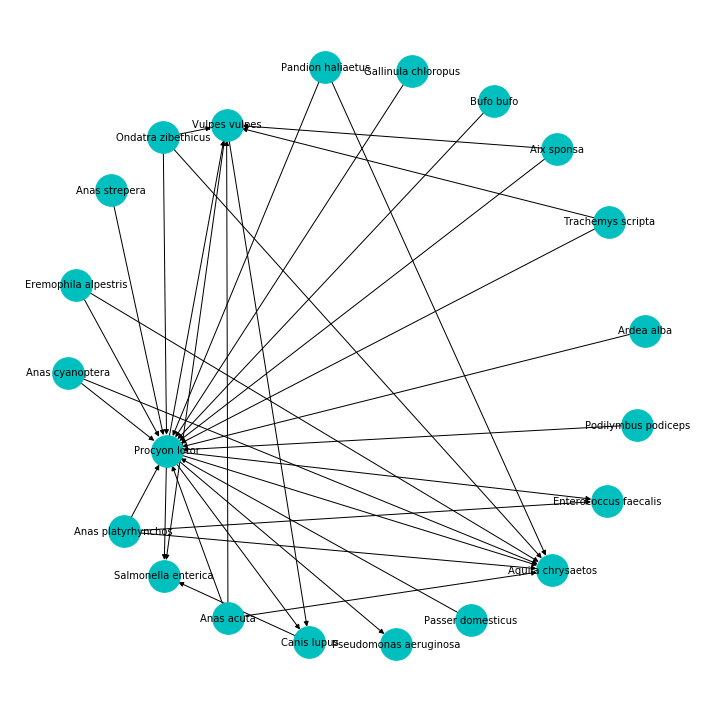

In [592]:
plt.figure(figsize=(10,10))
edge_labels = nx.get_edge_attributes(G,'label')

pos = nx.spring_layout(G, iterations=1000, k=40) 
#pos = nx.random_layout(G)
#pos = nx.circular_layout(G)
#pos = nx.spectral_layout(G)
#pos = nx.shell_layout(G, scale=1)

#nodeColors = nx.get_node_attributes(G,'color')

#nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels, font_size=10, font_color='blue')

#nx.draw_networkx_nodes(G, pos, node_color=nodeColors.values())

nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='c', alpha= 1, arrows=True, 
                    linewidths=1, font_color="black", font_size=10, style = 'dashed')

plt.axis('off')
plt.tight_layout()
plt.show()

In [425]:
G[1]

KeyError: 1

In [400]:
G.adj[0]

KeyError: 0

In [401]:
nx.degree(G)

DiDegreeView({})

In [447]:
taxaFoundInCountry

,key,species,count
0,2020591,Tingis cardui,65
1,5424258,Hyaloperonospora parasitica,35
2,2578591,Erysiphe mayorii,1
3,4291199,Rhinocyllus conicus,4
4,1183775,Larinus planus,9
5,2514802,Puccinia cnici-oleracei,18
6,2515256,Puccinia cnici,21
7,1622979,Xyphosia miliaria,8
8,1627994,Terellia tussilaginis,2
9,5263086,Ophiobolus acuminatus,39


In [464]:
taxaFoundInCountry

,key,species,count
0,2020591,Tingis cardui,65
1,5424258,Hyaloperonospora parasitica,35
2,2578591,Erysiphe mayorii,1
3,4291199,Rhinocyllus conicus,4
4,1183775,Larinus planus,9
5,2514802,Puccinia cnici-oleracei,18
6,2515256,Puccinia cnici,21
7,1622979,Xyphosia miliaria,8
8,1627994,Terellia tussilaginis,2
9,5263086,Ophiobolus acuminatus,39


In [529]:
filename = "waste.csv"
interactingTaxa.to_csv (filename, index = True, header=True) 